##**Instalación de la librería Lazypredict**



In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importar librerías**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


##**Cargar el dataset**

In [ ]:
df_chagas = pd.read_csv('/content/datafinal.csv')

In [ ]:
df_chagas.head(10)

,Unnamed: 0,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.30
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
5,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.15


In [ ]:
df_chagas.shape

(8714, 2050)

In [ ]:
df_chagas.dtypes

Unnamed: 0      int64
Col_0           int64
Col_1           int64
Col_2           int64
Col_3           int64
               ...   
Col_2044        int64
Col_2045        int64
Col_2046        int64
Col_2047        int64
pIC50         float64
Length: 2050, dtype: object

In [ ]:
#Definir la matriz con variables explicativas y el vector respuesta
Xc = df_chagas.drop('pIC50', axis=1)
Yc = df_chagas.pIC50  

In [ ]:
Yc.describe()

count   8714.00
mean       5.57
std        1.51
min        1.76
25%        4.44
50%        5.12
75%        6.60
max       10.24
Name: pIC50, dtype: float64

In [ ]:
Xc.describe()

,Unnamed: 0,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
count,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,...,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00,8714.00
mean,4356.50,0.00,0.22,0.03,0.01,0.01,0.01,0.01,0.00,0.02,...,0.01,0.01,0.00,0.01,0.03,0.01,0.01,0.01,0.00,0.00
std,2515.66,0.03,0.42,0.18,0.10,0.12,0.11,0.10,0.06,0.12,...,0.11,0.08,0.04,0.12,0.17,0.12,0.10,0.08,0.02,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2178.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4356.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,6534.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,8713.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


##**Definir el conjunto de entrenamiento y de test**

In [ ]:
#Definir os conjuntos de entrenamiento y test
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=42)

In [ ]:
print(Yc_train)

4890   7.92
1153   6.00
6538   4.30
7897   6.49
1242   5.90
       ... 
5734   4.60
5191   7.22
5390   4.49
860    4.61
7270   3.70
Name: pIC50, Length: 6971, dtype: float64


##**Establecer el modelo con lazyregresor**

In [ ]:
#Se establece el modelo
modelo = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = modelo.fit(Xc_train, Xc_train, Yc_train, Yc_train)
models_test, predictions_test = modelo.fit(Xc_train, Xc_test, Yc_train, Yc_test)

100%|██████████| 42/42 [00:00<00:00, 59776.30it/s]


In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,0.00,316.56
DecisionTreeRegressor,1.00,1.00,0.00,2.86
ExtraTreeRegressor,1.00,1.00,0.00,3.66
GaussianProcessRegressor,1.00,1.00,0.04,147.14
RandomForestRegressor,0.96,0.97,0.27,168.43
BaggingRegressor,0.93,0.95,0.33,18.92
MLPRegressor,0.90,0.93,0.41,12.77
XGBRegressor,0.88,0.92,0.44,34.89
LGBMRegressor,0.80,0.86,0.57,7.14


In [ ]:
#Importar las librerías para ajustar el modelo
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
Xc_train.shape[1]

In [ ]:
#Ajuste del modelo 
model2=DecisionTreeRegressor(random_state=120).fit(Xc_train,Yc_train)
model2

DecisionTreeRegressor(random_state=120)

In [ ]:
#score o R@2
model2.score(Xc_train,Yc_train)

1.0

##**Predicción modelo**

In [ ]:
model2.predict(Xc_test)

array([4.19382003, 4.7577071 , 4.48214458, ..., 3.38721614, 5.58806395,
       4.49485002])

##**PCA sobre Xc**

In [ ]:
# PCA sobre Xc
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 95% of the variance
for comp in range(3, Xc.shape[1]):
    pca = PCA(n_components= comp, random_state=159)
    pca.fit(Xc)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.95:
        break
        
Final_PCA_Xc = PCA(n_components= final_comp,random_state=42)
Final_PCA_Xc.fit(Xc)
PCA_Xc=Final_PCA_Xc.transform(Xc)
num_comps = comp_check.shape[0]

In [ ]:
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 3 components, we can explain 0.9999946679275359% of the variability in the original data.


##**Se usan 3 compontentes para explicar el 99% de la varianza**

In [ ]:
PCA_Xc

array([[-4.35650007e+03, -8.91250919e-01,  1.43059339e-03],
       [-4.35550009e+03, -9.04870543e-01,  1.12500850e-01],
       [-4.35450006e+03, -9.68142715e-01,  2.61296248e-01],
       ...,
       [ 4.35449999e+03, -6.43737146e-01, -5.63289403e-01],
       [ 4.35549997e+03,  3.00450285e-02, -3.06002130e-01],
       [ 4.35650013e+03, -4.78296263e-01,  1.27541277e+00]])

##**Visualización de métricas**

[(0.0, 1.0)]

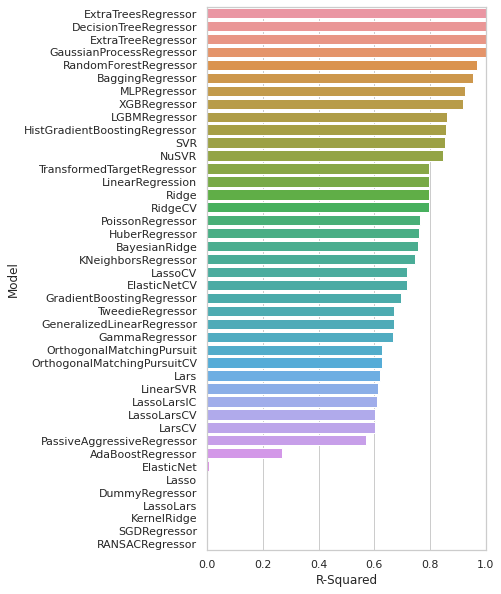

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

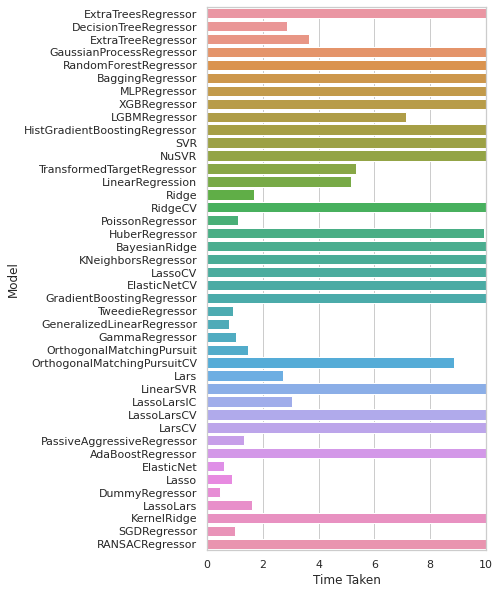

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

##**Modelo de clasificación(Variables reducidas)**

In [ ]:
#Modelo de clasificación 
import sklearn.linear_model 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
import random as rm

In [ ]:
Xp1_train, Xp1_test, Yp1_train, Yp1_test = train_test_split(PCA_Xc, Yc, test_size=0.2, random_state=42)

In [ ]:
#Descripción de los datos de entrenamiento
Yp1_train.describe()

count   6971.00
mean       5.58
std        1.51
min        1.76
25%        4.46
50%        5.15
75%        6.64
max       10.24
Name: pIC50, dtype: float64

In [ ]:
#Definir el treshold para clasificar el valor de IPC50 en 1 o 0
Yp2_train= [1 if i >= Yc.mean() else 0 for i in Yp1_train]

In [ ]:
#Ver el vector numérico de 1 y 0
Yp2_train

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [ ]:
#Ajuste del modelo de regresión logística
#Modelo de clasificación
Model_clasification_pca=LogisticRegression(random_state=0).fit(Xp1_train, Yp2_train)

In [ ]:
#Información del modelo
print("Intercepto:", Model_clasification_pca.intercept_)
print("Accuracy de entrenamiento:", Model_clasification_pca.score(Xp1_train, Yp2_train))

Intercepto: [-0.33037203]
Accuracy de entrenamiento: 0.7042031272414288


In [2]:
import numpy as np

In [3]:
np.exp(-0.33037203) 

0.7186563219810028

In [ ]:
np.exp(Model_clasification_pca.intercept_)

array([0.71865632])

In [ ]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = Model_clasification_pca.predict_proba(X = Xp1_test)
predicciones = pd.DataFrame(predicciones, columns = Model_clasification_pca.classes_)
predicciones.head(20)

,0,1
0,0.51,0.49
1,0.50,0.50
2,0.64,0.36
3,0.62,0.38
4,0.01,0.99
5,0.66,0.34
6,0.81,0.19
7,0.70,0.30
8,0.54,0.46
9,0.62,0.38


In [ ]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
Ypca_pred= Model_clasification_pca.predict(X = Xp1_test)
Ypca_pred

array([0, 0, 0, ..., 0, 0, 0])

##**Matriz de confusiónd de datos reducidos**

In [ ]:
#Definir el treshold para clasificar el valor de IPC50 en 1 o 0
Ypca2_test= [1 if i >= Yc.mean() else 0 for i in Yp1_test]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ypca2_test, Ypca_pred)
Conf_matrix=print(confusion_matrix)

[[945 140]
 [349 309]]


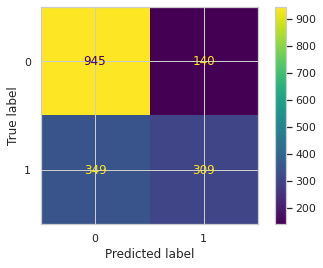

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Ypca2_test, Ypca_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1],)

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Ypca2_test, Ypca_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1085
           1       0.69      0.47      0.56       658

    accuracy                           0.72      1743
   macro avg       0.71      0.67      0.68      1743
weighted avg       0.71      0.72      0.71      1743



##**Matriz de consusión(SVM)**

In [ ]:
Yp2_train

In [ ]:
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(Xp1_train, Yp2_train)

SVC(random_state=0)
predictions_pca = clf.predict(Xp1_test)

predictions_pca

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
#Matriz de confusión del SVM 
Conf_matrix= confusion_matrix(Ypca2_test, predictions_pca, labels=clf.classes_)
Conf_matrix

array([[918, 167],
       [364, 294]])

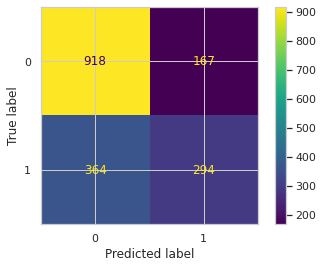

In [ ]:
#Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_matrix,display_labels=clf.classes_)
disp.plot()
plt.show()

##**Ajuste del modelo (Variables sin reducción de dimensión)**

In [ ]:
Yc1_train= [1 if i >= Yc.mean() else 0 for i in Yc_train]

In [ ]:
Yc1_train

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [ ]:
#Definir el treshold para clasificar el valor de IPC50 en 1 o 0
Yp2_train= [1 if i >= Yc.mean() else 0 for i in Yp1_train]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Modelo de clasificación
Model_clasification_chagas=LogisticRegression(random_state=0).fit(Xc_train, Yc1_train)

In [ ]:
#Información del modelo
print("Intercepto:", Model_clasification_chagas.intercept_)

print("Accuracy de entrenamiento:", Model_clasification_chagas.score(Xc_train, Yc1_train))

Intercepto: [-0.53829956]
Accuracy de entrenamiento: 0.830727298809353


In [ ]:
np.exp(Model_clasification_chagas.intercept_)

array([0.58374003])

In [ ]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = Model_clasification_chagas.predict_proba(X = Xc_test)
predicciones = pd.DataFrame(predicciones, columns = Model_clasification_chagas.classes_)
predicciones.head(20)

,0,1
0,0.77,0.23
1,0.35,0.65
2,0.81,0.19
3,0.71,0.29
4,0.02,0.98
5,0.22,0.78
6,0.87,0.13
7,0.87,0.13
8,0.38,0.62
9,0.75,0.25


In [ ]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
Y_pred_c= Model_clasification_chagas.predict(X = Xc_test)
Y_pred_c

array([0, 1, 0, ..., 0, 1, 1])

##**Matriz de confusión**

In [ ]:
Yc1_test=[1 if i >= Yc.mean() else 0 for i in Yc_test]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Yc1_test, Y_pred_c)
Conf_matrix=print(confusion_matrix)

[[934 151]
 [186 472]]


##**Matriz de forma gráfica**

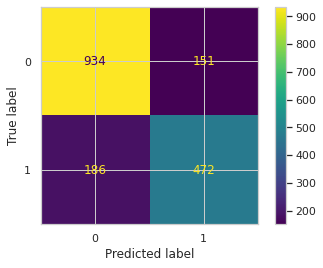

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Yc1_test, Y_pred_c)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1],)

cm_display.plot()
plt.show()

##**Métricas**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Yc1_test, Y_pred_c))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1085
           1       0.76      0.72      0.74       658

    accuracy                           0.81      1743
   macro avg       0.80      0.79      0.79      1743
weighted avg       0.81      0.81      0.81      1743



## **Modelo de clasificación usando SVM(SUPPORT VECTOR MACHINES)**


In [ ]:
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(Xc_train, Yc1_train)

SVC(random_state=0)
predictions_chagas = clf.predict(Xc_test)

predictions_chagas

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
#Matriz de confusión del SVM 
cm = confusion_matrix(Yc1_test, predictions_chagas, labels=clf.classes_)
cm

array([[799, 286],
       [297, 361]])

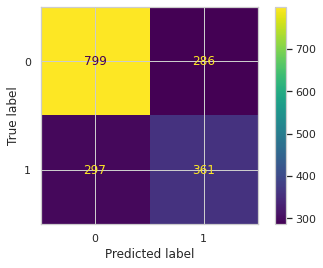

In [ ]:
#Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()